<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Nearest_Neighbors_%26_Softmax_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**서울대학교 머신러닝 딥러닝 이준석 교수님 수업 정리**

## Nearest Neighbors & Softmax Classifiers


### 1. Nearest Neighbor Classifier

- 개념: 새로운 입력으로 들어온 데이터를 특정값으로 분류하는데 현재 데이터와 가장 가까운 k개의 데이터를 찾아 가장 많은 분류 값으로 현재의 데이터를 분류하는 알고리즘이다.


- distance(similarity) 정의:
>- L1 distance: 절댓값 이용

>>> 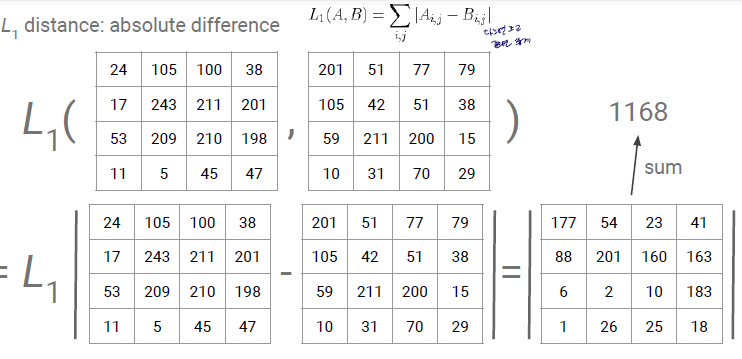


>- L2 distance: 차이의 제곱 이용

>>> 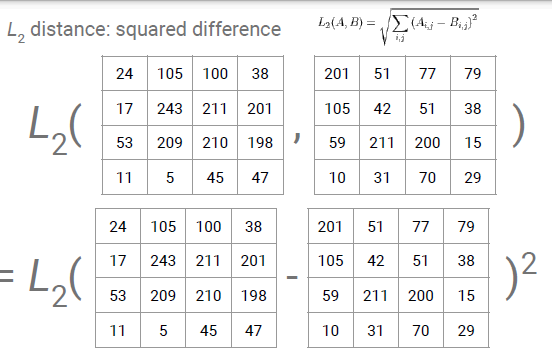


- 사용: **training 시에는 데이터 기억**만 하고, predict 시에 바로 가장 distance가 가장 작은 그룹으로 labelling

>> 문제점: training시에 1번 기억하면 됨 (데이터 사이즈 관계x) **하지만 prediction 시에는 dataset의 크기만큼 돌려야함** -> 차라리 train을 해서 모델을 만들어놓고 prediction을 오래 안하는 것이 훨씬 효율적임!

In [2]:
import numpy as np

class NearestNeighbor:
  def __init__(self):
    pass
  def train(self, images, labels):
    # simply remembers all the training data
    self.images = images
    self.labels = labels
  def predict(self, test_image):
    # assume that each image is vectorized to 1D
    min_dist = sys.maxint # maximum integer in python
    for i in range(self.images.shape[0]):
      dist = np.sum(np.abs(self.images[i, :] - test_image)) #L1 distance
      if dist < min_dist:
        min_dist = dist
        min_index = i
    return self.labels[min_index]

- 문제점

>> 이미지 분류에서 pixel 단위에서 distance를 계산하면 사람 눈에는 거의 차이가 없기 때문에 전혀 informative하지 않음

>> Curse of dimensionality

>> test 시간이 너무 오래  걸림


- KNN (K-nearest neighbor)

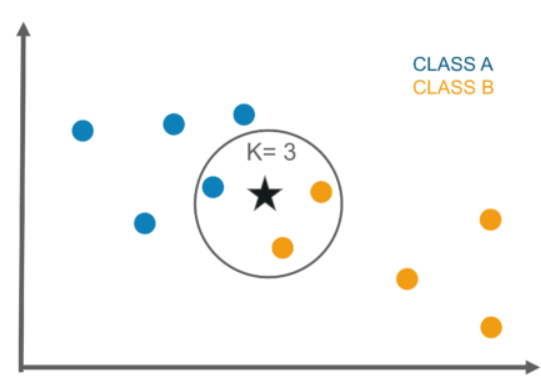

>> 가장 가까운 3개의 기존 데이터의 분류를 살펴본 결과 , B분류가 2개 A분류가 1개이므로 새로운 데이터 '별' 은 B분류로 할당



### 2. Linear Classifier

- 배경: training에서 해당 training example의 모든 값을 기억하고 있지 않고, 후보 label에 대한 score을 반환하는 f(x)를 만들어보자!이 f(x)함수를 가장 간단한 linear function을 이용해서 input pixel의 weighted sum을 만들어보자!

>> 아래 그림 보면, 각 label별로 다른 w를 만들어서 weighted sum=label을 만들기

>> 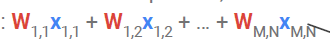



- 방법: Image x에 대해 weight w를 곱하고 bias b를 더해서 label y에 해당하는 길이로 만들기

>> 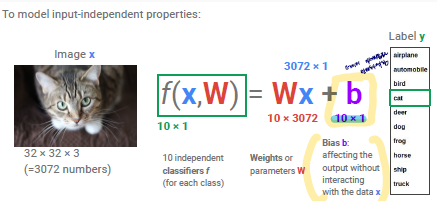



- 장점

>> training 시에 데이터를 모두 기억하지 않고 W만 찾아서 저장하면 됨

>> test 시에는 Wx만 계산하면 되므로 훨씬 빠름 (K개의 CLASS 숫자 만큼만)

### 3. Softmax Classifier

- 배경: Linear classifier는 어느정도의 score가 큰 것인지에 대한 절대적인 기준이 없음 + 확률적인 해석이 어려움

- Sigmoid function 이용

>> score 간의 차이가 크면, 그 score에 해당하는 class로 분류될 가능성이 더 크다는 것을 의미함 -> score의 차이를 sigmoid function에 넣은 값을 만듦

>> 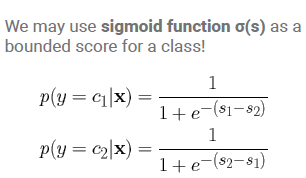

>> sigmoid 함수

>>> s가 커지면 1에 가까워지고, s가 작아지면 0에 가까워지고 항상 0과 1 사이 값을 가짐

>>> 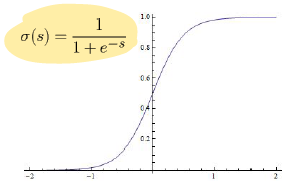

>> class 개수>2인 경우에 일반화하면, exp (각 class의 score)에 대한 비율로 나타낼 수 있음

>> 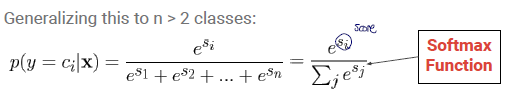

### 4. Training Softmax Classifiers

- loss 계산 방법으로 다음 두가지 사용

>- **Cross Entropy**

>> 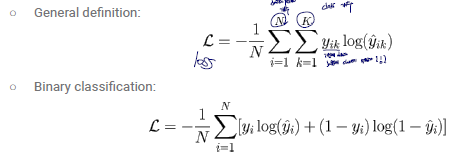


>> yhat_ik는 예측된 score (softmax 기반이니까 0이랑 1사이)이고,y_ik는 실제 y이기에 0아니면 1임. 즉, y_ik는 하나의 값 (Ti)에서만 log가 살아남고, 그 외에 값은 다 사라짐. 이를 반영하면 아래와 같이 간단히 나타낼 수 있음.

>> 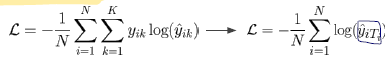

즉, loss= -log("our predicted probability for the true class")라고 정의할 수 있는데, 정답 class에 대한 예측된 score은 확률처럼 해석하면, 정답이면 1에 수렴하고 오답이면 0에 수렴하는데, 오답이면 loss가 매우 커지고 정답이면 loss가 0에 가깝게 나옴.


>- Kullback-Leibler (KL) Divergence

>> 두 확률분포의 차이를 나타낼 수 있고, 이것을 쓰면 distance처럼 쓸 수 있음.

>> 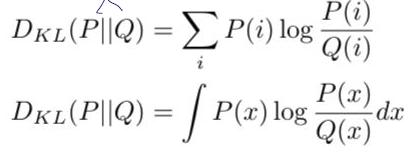
